In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

In [2]:
train = pd.read_csv('train.csv')
test  = pd.read_csv('test.csv')

In [3]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [5]:
def bar_chart (feature) :
    survived = train[train['Survived']==1] [feature].value_counts()
    
    dead = train[train['Survived']==0] [feature].value_counts()
    
    df = pd.DataFrame([survived,dead])
    df.index = ['Survived','Dead']
    df.plot(kind = 'bar',stacked = True, figsize=(10,5))

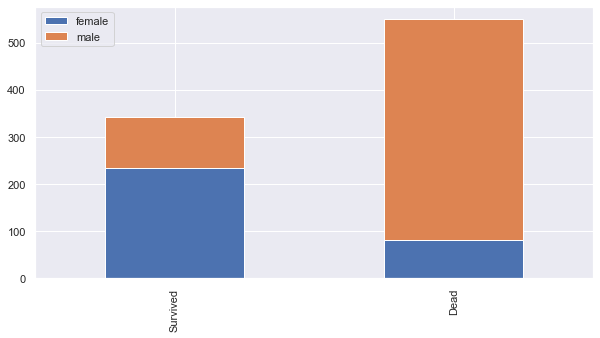

In [6]:
bar_chart('Sex')

In [7]:
train_test_data = [train,test]
for dataset in train_test_data:
    dataset['Title'] = dataset ['Name'].str.extract('([A-Za-z]+)\.',expand=False)

In [8]:
title_map = {"Mr": 0,"Miss": 1,"Mrs": 2,"Master": 3,"Dr": 3,"Rev": 3,"Mile": 3,"Col": 3,"Major": 3,"Lady": 3,"Ms": 3,"Johnkheer": 3,"Capt": 3,"Sir": 3,"Countess": 3,"Don": 3,"Mme": 3}
for dataset in train_test_data:
    dataset['Title']=dataset['Title'].map(title_map)

In [9]:
sex_map ={"male": 0,"female": 1} 
for dataset in train_test_data:
    dataset['Sex']=dataset['Sex'].map(sex_map)

In [10]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S,0.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C,2.0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S,2.0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",0,27.0,0,0,211536,13.0000,NaN,S,3.0
887,888,1,1,"Graham, Miss. Margaret Edith",1,19.0,0,0,112053,30.0000,B42,S,1.0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,NaN,1,2,W./C. 6607,23.4500,NaN,S,1.0
889,890,1,1,"Behr, Mr. Karl Howell",0,26.0,0,0,111369,30.0000,C148,C,0.0


In [11]:
train.Title.isna().sum()

3

In [12]:
train_Title = train.Title.median() 

In [13]:
train.Title = train.Title.fillna(train_Title)

In [14]:
train.Title.isna().sum()

0

In [15]:
test_Title = train.Title.median() 

In [16]:
test.Title = test.Title.fillna(test_Title)

In [17]:
test.Title.isna().sum()

0

In [18]:
train.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [19]:
embarked_map ={"S": 0,"C": 1,"Q": 2} 
for dataset in train_test_data:
    dataset['Embarked']=dataset['Embarked'].map(embarked_map)

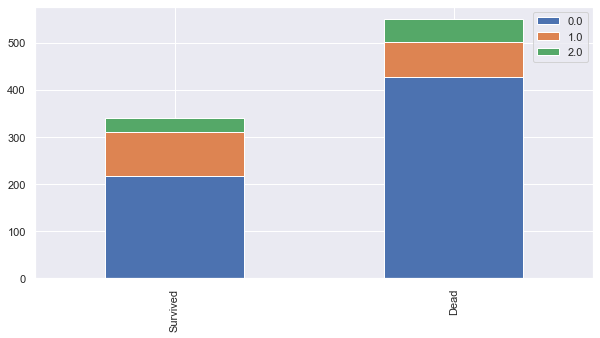

In [20]:
bar_chart('Embarked')

In [21]:
train_embarked = train.Embarked.median() 

In [22]:
train.Embarked = train.Embarked.fillna(train_embarked)

In [23]:
train.Embarked.isna().sum()

0

In [24]:
train.Fare.value_counts()

8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
8.4583      1
9.8375      1
8.3625      1
14.1083     1
17.4000     1
Name: Fare, Length: 248, dtype: int64

In [25]:
for dataset in train_test_data:
    dataset.loc[dataset['Fare']<=20,'Fare']=0,
    dataset.loc[(dataset['Fare'] > 20) & (dataset['Fare'] <= 50), 'Fare'] = 1,
    dataset.loc[(dataset['Fare'] > 50) & (dataset['Fare'] <= 100), 'Fare'] = 2,
    dataset.loc[(dataset['Fare'] > 100) & (dataset['Fare'] <= 200), 'Fare'] = 3,
    dataset.loc[ dataset['Fare'] > 200, 'Fare'] = 4
        

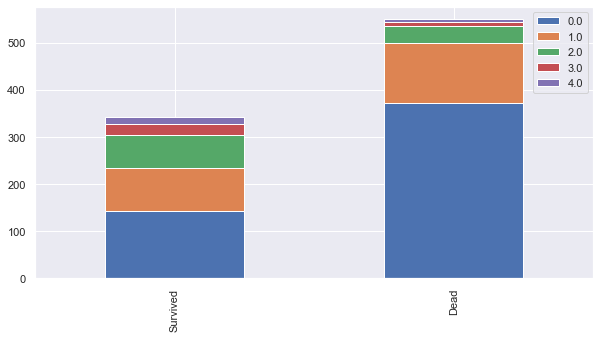

In [26]:
bar_chart('Fare')

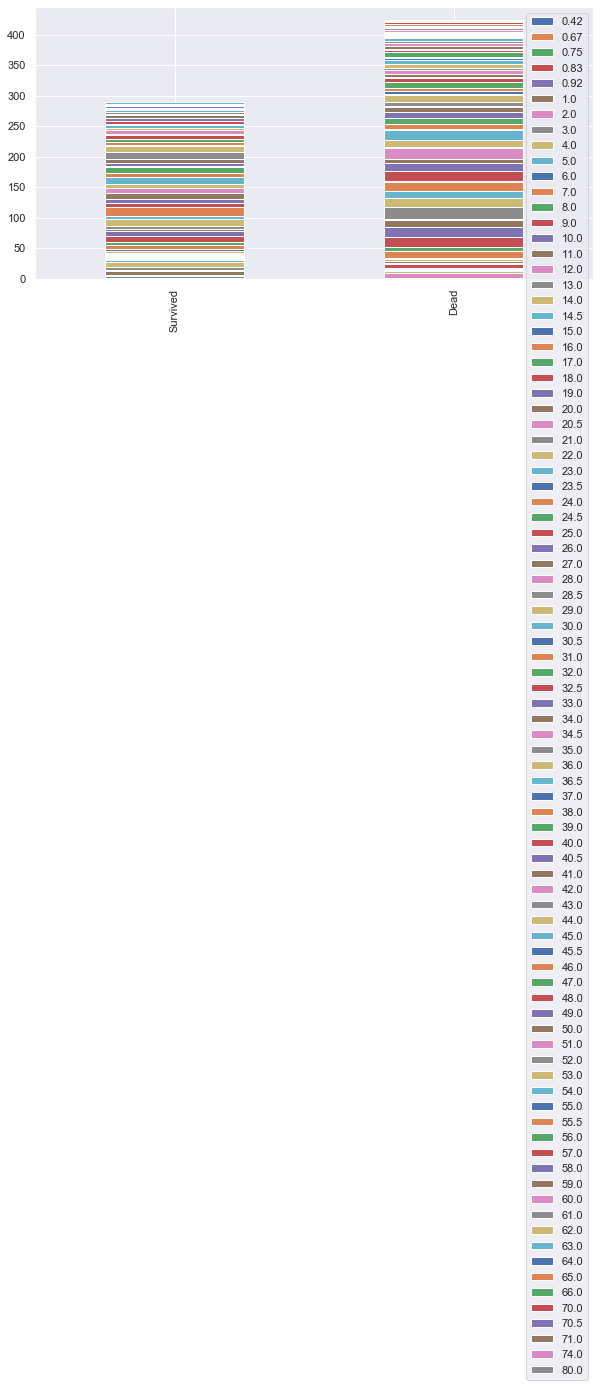

In [27]:
bar_chart('Age')

In [28]:
train.Fare.value_counts()

0.0    515
1.0    216
2.0    107
3.0     33
4.0     20
Name: Fare, dtype: int64

In [29]:
train.Age.value_counts()

24.00    30
22.00    27
18.00    26
19.00    25
30.00    25
         ..
55.50     1
70.50     1
66.00     1
23.50     1
0.42      1
Name: Age, Length: 88, dtype: int64

In [30]:
train.Age

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [31]:
for dataset in train_test_data:
    dataset.loc[dataset['Age']<=10,'Age']=0,
    dataset.loc[(dataset['Age'] > 10) & (dataset['Age'] <= 20), 'Age'] = 1,
    dataset.loc[(dataset['Age'] > 20) & (dataset['Age'] <= 30), 'Age'] = 2,
    dataset.loc[(dataset['Age'] > 30) & (dataset['Age'] <= 50), 'Age'] = 3,
    dataset.loc[ dataset['Age'] > 50, 'Age'] = 4

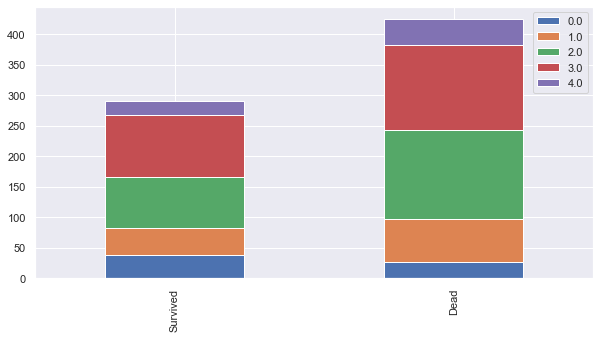

In [32]:
bar_chart('Age')

In [33]:
train.Age.value_counts()

3.0    241
2.0    230
1.0    115
0.0     64
4.0     64
Name: Age, dtype: int64

In [34]:
train.Age.isna().sum()

177

In [35]:
train_Age = train.Age.median() 

In [36]:
train_Age

2.0

In [37]:
train.Age = train.Age.fillna(train_Age)

In [38]:
train.Age.isna().sum()

0

In [39]:
test.Age.isna().sum()

86

In [40]:
test_Age = test.Age.median()

In [41]:
test.Age = test.Age.fillna(test_Age)

In [42]:
test.Age.isna().sum()

0

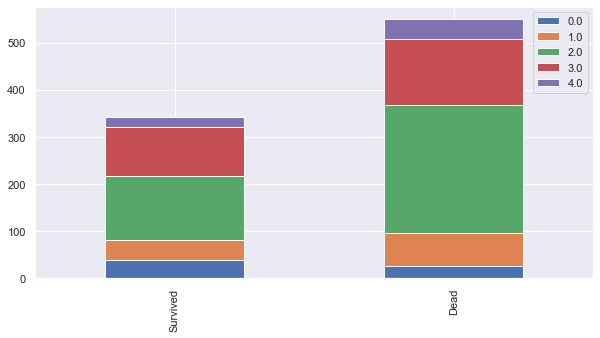

In [43]:
bar_chart('Age')

In [44]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,2.0,1,0,A/5 21171,0.0,NaN,0.0,0.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,3.0,1,0,PC 17599,2.0,C85,1.0,2.0
2,3,1,3,"Heikkinen, Miss. Laina",1,2.0,0,0,STON/O2. 3101282,0.0,NaN,0.0,1.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,3.0,1,0,113803,2.0,C123,0.0,2.0
4,5,0,3,"Allen, Mr. William Henry",0,3.0,0,0,373450,0.0,NaN,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",0,2.0,0,0,211536,0.0,NaN,0.0,3.0
887,888,1,1,"Graham, Miss. Margaret Edith",1,1.0,0,0,112053,1.0,B42,0.0,1.0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,2.0,1,2,W./C. 6607,1.0,NaN,0.0,1.0
889,890,1,1,"Behr, Mr. Karl Howell",0,2.0,0,0,111369,1.0,C148,1.0,0.0


In [45]:
train.SibSp.value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [46]:
for dataset in train_test_data:
    dataset.loc[dataset['SibSp']<=0,'SibSp']=0,
    dataset.loc[(dataset['SibSp'] > 1) & (dataset['SibSp'] <= 3), 'SibSp'] = 1,
    dataset.loc[ dataset['SibSp'] > 3, 'SibSp'] = 2

In [47]:
train.SibSp.value_counts()

0    608
1    253
2     30
Name: SibSp, dtype: int64

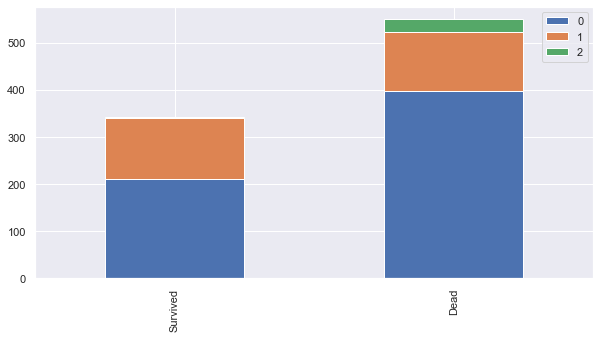

In [48]:
bar_chart('SibSp')

In [49]:
train.Parch.value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [50]:
for dataset in train_test_data:
    dataset.loc[dataset['Parch']<=0,'Parch']=0,
    dataset.loc[(dataset['Parch'] > 1) & (dataset['Parch'] <= 3), 'Parch'] = 1,
    dataset.loc[ dataset['Parch'] > 3, 'Parch'] = 2

In [51]:
train.Parch.value_counts()

0    678
1    203
2     10
Name: Parch, dtype: int64

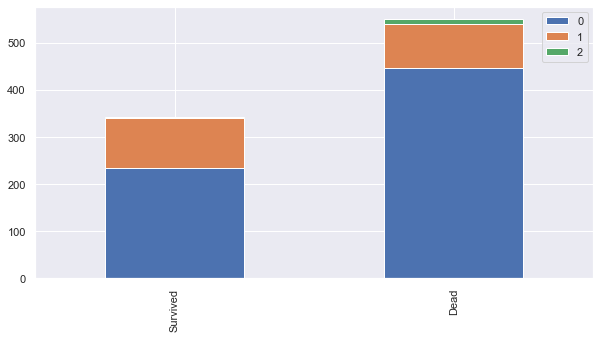

In [52]:
bar_chart('Parch')

In [53]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null int64
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       891 non-null float64
Title          891 non-null float64
dtypes: float64(4), int64(6), object(3)
memory usage: 90.6+ KB


In [54]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null int64
Age            418 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null int64
Title          418 non-null float64
dtypes: float64(3), int64(6), object(3)
memory usage: 39.3+ KB


In [55]:
train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
Title            0
dtype: int64

In [56]:
test.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
Title            0
dtype: int64

In [57]:
test.Fare.isna().sum()

1

In [58]:
test_fare = test.Fare.median() 

In [59]:
test_fare

0.0

In [60]:
test.Fare = test.Fare.fillna(test_fare)

In [61]:
test.Fare.isna().sum()

0

In [62]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,2.0,1,0,A/5 21171,0.0,NaN,0.0,0.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,3.0,1,0,PC 17599,2.0,C85,1.0,2.0
2,3,1,3,"Heikkinen, Miss. Laina",1,2.0,0,0,STON/O2. 3101282,0.0,NaN,0.0,1.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,3.0,1,0,113803,2.0,C123,0.0,2.0
4,5,0,3,"Allen, Mr. William Henry",0,3.0,0,0,373450,0.0,NaN,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",0,2.0,0,0,211536,0.0,NaN,0.0,3.0
887,888,1,1,"Graham, Miss. Margaret Edith",1,1.0,0,0,112053,1.0,B42,0.0,1.0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,2.0,1,1,W./C. 6607,1.0,NaN,0.0,1.0
889,890,1,1,"Behr, Mr. Karl Howell",0,2.0,0,0,111369,1.0,C148,1.0,0.0


In [63]:
for dataset in train_test_data:
    dataset['Cabin'] = dataset['Cabin'].str[:1]

In [64]:
train.Cabin

0      NaN
1        C
2      NaN
3        C
4      NaN
      ... 
886    NaN
887      B
888    NaN
889      C
890    NaN
Name: Cabin, Length: 891, dtype: object

In [65]:
train.Cabin.value_counts()

C    59
B    47
D    33
E    32
A    15
F    13
G     4
T     1
Name: Cabin, dtype: int64

In [66]:
test.Cabin.value_counts()

C    35
B    18
D    13
E     9
F     8
A     7
G     1
Name: Cabin, dtype: int64

In [67]:
cabin_map ={"A": 0.0,"B": 0.5,"C": 1.0,"D": 1.5,"E": 2.0,"F": 2.5,"G": 3.0,"T": 3.5} 
for dataset in train_test_data:
    dataset['Cabin']=dataset['Cabin'].map(cabin_map)

In [68]:
test.Cabin.value_counts()

1.0    35
0.5    18
1.5    13
2.0     9
2.5     8
0.0     7
3.0     1
Name: Cabin, dtype: int64

In [69]:
train.Cabin.isna().sum()

687

In [70]:
train_cabin = train.Cabin.median() 

In [71]:
train_cabin

1.0

In [72]:
train.Cabin = train.Cabin.fillna(train_cabin)

In [73]:
train.Cabin.isna().sum()

0

In [74]:
test.Cabin.isna().sum()

327

In [75]:
test_cabin = test.Cabin.median() 

In [76]:
test_cabin

1.0

In [77]:
test.Cabin = test.Cabin.fillna(test_cabin)

In [78]:
test.Cabin.isna().sum()

0

In [79]:
test.isna().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
Title          0
dtype: int64

In [80]:
train.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
Title          0
dtype: int64

In [81]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,2.0,1,0,A/5 21171,0.0,1.0,0.0,0.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,3.0,1,0,PC 17599,2.0,1.0,1.0,2.0
2,3,1,3,"Heikkinen, Miss. Laina",1,2.0,0,0,STON/O2. 3101282,0.0,1.0,0.0,1.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,3.0,1,0,113803,2.0,1.0,0.0,2.0
4,5,0,3,"Allen, Mr. William Henry",0,3.0,0,0,373450,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",0,2.0,0,0,211536,0.0,1.0,0.0,3.0
887,888,1,1,"Graham, Miss. Margaret Edith",1,1.0,0,0,112053,1.0,0.5,0.0,1.0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,2.0,1,1,W./C. 6607,1.0,1.0,0.0,1.0
889,890,1,1,"Behr, Mr. Karl Howell",0,2.0,0,0,111369,1.0,1.0,1.0,0.0


In [82]:
train_test_data

[     PassengerId  Survived  Pclass  \
 0              1         0       3   
 1              2         1       1   
 2              3         1       3   
 3              4         1       1   
 4              5         0       3   
 ..           ...       ...     ...   
 886          887         0       2   
 887          888         1       1   
 888          889         0       3   
 889          890         1       1   
 890          891         0       3   
 
                                                   Name  Sex  Age  SibSp  \
 0                              Braund, Mr. Owen Harris    0  2.0      1   
 1    Cumings, Mrs. John Bradley (Florence Briggs Th...    1  3.0      1   
 2                               Heikkinen, Miss. Laina    1  2.0      0   
 3         Futrelle, Mrs. Jacques Heath (Lily May Peel)    1  3.0      1   
 4                             Allen, Mr. William Henry    0  3.0      0   
 ..                                                 ...  ...  ...    ...  

In [112]:
features_drop = ['PassengerId']
train = train.drop(features_drop,axis=1)
test = test.drop(features_drop,axis=1)

In [113]:
train_test_data

[     PassengerId  Survived  Pclass  \
 0              1         0       3   
 1              2         1       1   
 2              3         1       3   
 3              4         1       1   
 4              5         0       3   
 ..           ...       ...     ...   
 886          887         0       2   
 887          888         1       1   
 888          889         0       3   
 889          890         1       1   
 890          891         0       3   
 
                                                   Name  Sex  Age  SibSp  \
 0                              Braund, Mr. Owen Harris    0  2.0      1   
 1    Cumings, Mrs. John Bradley (Florence Briggs Th...    1  3.0      1   
 2                               Heikkinen, Miss. Laina    1  2.0      0   
 3         Futrelle, Mrs. Jacques Heath (Lily May Peel)    1  3.0      1   
 4                             Allen, Mr. William Henry    0  3.0      0   
 ..                                                 ...  ...  ...    ...  

In [115]:
train

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title
0,0,3,0,2.0,1,0,0.0,1.0,0.0,0.0
1,1,1,1,3.0,1,0,2.0,1.0,1.0,2.0
2,1,3,1,2.0,0,0,0.0,1.0,0.0,1.0
3,1,1,1,3.0,1,0,2.0,1.0,0.0,2.0
4,0,3,0,3.0,0,0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
886,0,2,0,2.0,0,0,0.0,1.0,0.0,3.0
887,1,1,1,1.0,0,0,1.0,0.5,0.0,1.0
888,0,3,1,2.0,1,1,1.0,1.0,0.0,1.0
889,1,1,0,2.0,0,0,1.0,1.0,1.0,0.0


In [116]:
test

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title
0,3,0,3.0,0,0,0.0,1.0,2,0.0
1,3,1,3.0,1,0,0.0,1.0,0,2.0
2,2,0,4.0,0,0,0.0,1.0,2,0.0
3,3,0,2.0,0,0,0.0,1.0,0,0.0
4,3,1,2.0,1,1,0.0,1.0,0,2.0
...,...,...,...,...,...,...,...,...,...
413,3,0,2.0,0,0,0.0,1.0,0,0.0
414,1,1,3.0,0,0,3.0,1.0,1,0.0
415,3,0,3.0,0,0,0.0,1.0,0,0.0
416,3,0,2.0,0,0,0.0,1.0,0,0.0


In [117]:
train_data = train.drop('Survived', axis=1)
target = train['Survived']

train_data.shape, target.shape

((891, 9), (891,))

In [118]:
train_data.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title
0,3,0,2.0,1,0,0.0,1.0,0.0,0.0
1,1,1,3.0,1,0,2.0,1.0,1.0,2.0
2,3,1,2.0,0,0,0.0,1.0,0.0,1.0
3,1,1,3.0,1,0,2.0,1.0,0.0,2.0
4,3,0,3.0,0,0,0.0,1.0,0.0,0.0


In [119]:
test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title
0,3,0,3.0,0,0,0.0,1.0,2,0.0
1,3,1,3.0,1,0,0.0,1.0,0,2.0
2,2,0,4.0,0,0,0.0,1.0,2,0.0
3,3,0,2.0,0,0,0.0,1.0,0,0.0
4,3,1,2.0,1,1,0.0,1.0,0,2.0


In [120]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()

In [101]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Sex            891 non-null int64
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Fare           891 non-null float64
Cabin          891 non-null float64
Embarked       891 non-null float64
Title          891 non-null float64
dtypes: float64(5), int64(6)
memory usage: 76.7 KB


In [102]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

In [121]:
from sklearn.ensemble import RandomForestClassifier

In [122]:
clf = DecisionTreeClassifier()
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.82222222 0.80898876 0.7752809  0.76404494 0.86516854 0.84269663
 0.78651685 0.80898876 0.74157303 0.76404494]


In [123]:
round(np.mean(score)*100, 2)

79.8

In [126]:
clf = RandomForestClassifier(n_estimators=13)
clf.fit(train_data, target)

test_data = test.copy()
prediction = clf.predict(test_data)

In [127]:
submission = pd.DataFrame({
        "PassengerId": test["PassengerId"],
        "Survived": prediction
    })

submission.to_csv('submission.csv', index=False)

KeyError: 'PassengerId'